Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'AAVE'
against_currency = 'USD'

start = dt.datetime(2020,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-31,385.298737,369.995331,377.183685,377.611786,342371946,377.611786
2021-04-01,408.479919,374.290924,377.514648,406.692291,480081712,406.692291
2021-04-02,411.377075,385.415894,406.883606,385.420563,395544800,385.420563
2021-04-03,409.579529,382.788849,385.526978,404.309723,330959728,404.309723
2021-04-04,407.329315,388.300354,404.392944,397.924561,306918909,397.924561
...,...,...,...,...,...,...
2021-06-21,222.891769,171.375977,212.557663,205.751709,589171952,205.751709
2021-06-22,229.664383,198.024887,206.027145,214.090775,399527615,214.090775
2021-06-23,217.906403,193.354126,207.660141,210.859818,256051017,210.859818


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2021-03-31 to 2021-06-26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       87 non-null     float64
 1   Low        87 non-null     float64
 2   Open       87 non-null     float64
 3   Close      87 non-null     float64
 4   Volume     87 non-null     int64  
 5   Adj Close  87 non-null     float64
 6   Spread     87 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 5.4 KB


## Plot the closing value of aave over time

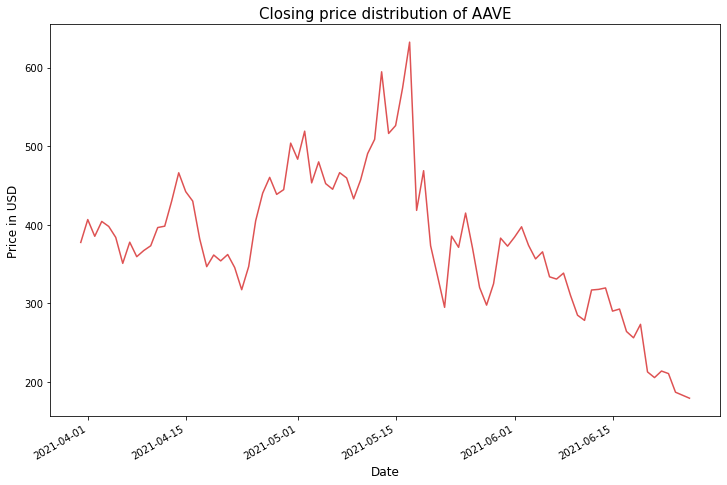

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of AAVE", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-31,385.298737,369.995331,377.183685,377.611786,342371946,377.611786
2021-04-01,408.479919,374.290924,377.514648,406.692291,480081712,406.692291
2021-04-02,411.377075,385.415894,406.883606,385.420563,395544800,385.420563
2021-04-03,409.579529,382.788849,385.526978,404.309723,330959728,404.309723
2021-04-04,407.329315,388.300354,404.392944,397.924561,306918909,397.924561
...,...,...,...,...,...,...
2021-06-21,222.891769,171.375977,212.557663,205.751709,589171952,205.751709
2021-06-22,229.664383,198.024887,206.027145,214.090775,399527615,214.090775
2021-06-23,217.906403,193.354126,207.660141,210.859818,256051017,210.859818


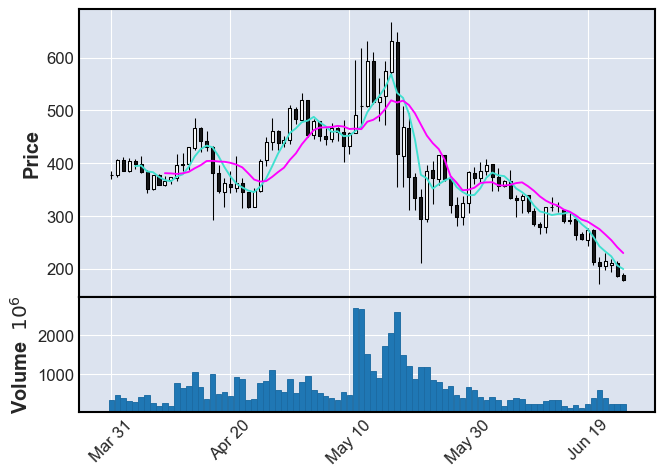

In [6]:
mpf.plot(temp_base_df, type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2021-1-1']
price_predict_df

,ds,y
0,2021-03-31,377.611786
1,2021-04-01,406.692291
2,2021-04-02,385.420563
3,2021-04-03,404.309723
4,2021-04-04,397.924561
...,...,...
82,2021-06-21,205.751709
83,2021-06-22,214.090775
84,2021-06-23,210.859818
85,2021-06-24,187.168747


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
112,2021-07-22,-18.704470,-364.587869,300.638600
113,2021-07-23,-36.417990,-396.127472,289.819134
114,2021-07-24,-38.369975,-415.318371,329.914828
115,2021-07-25,-33.525279,-430.633505,346.073184
116,2021-07-26,-37.043688,-454.809402,359.590975


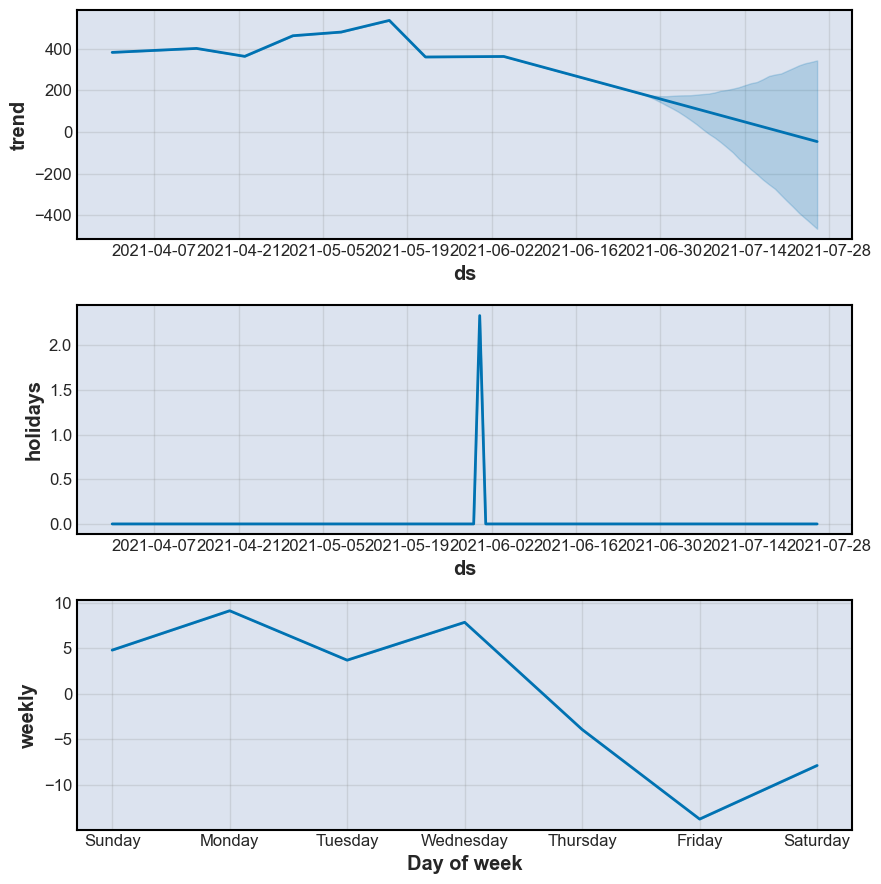

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

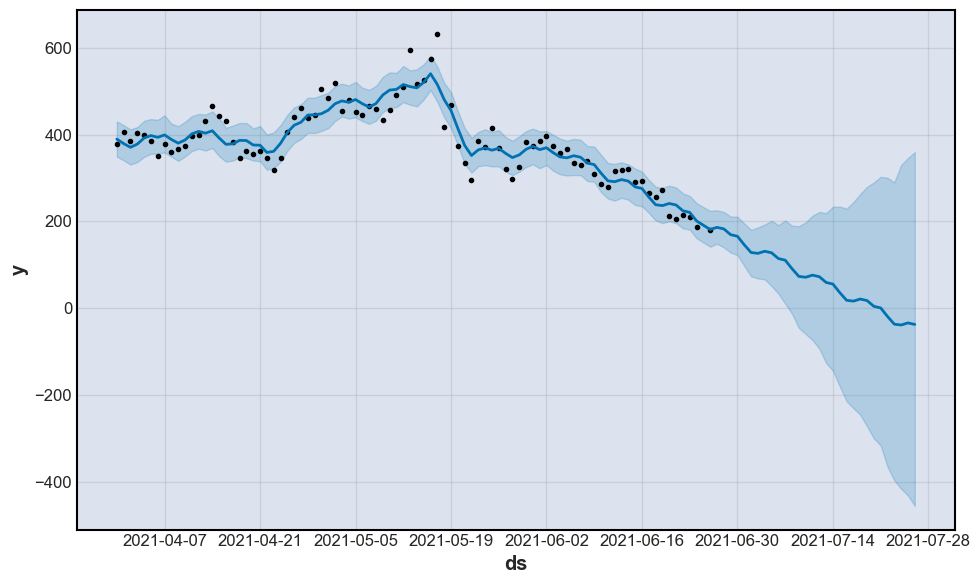

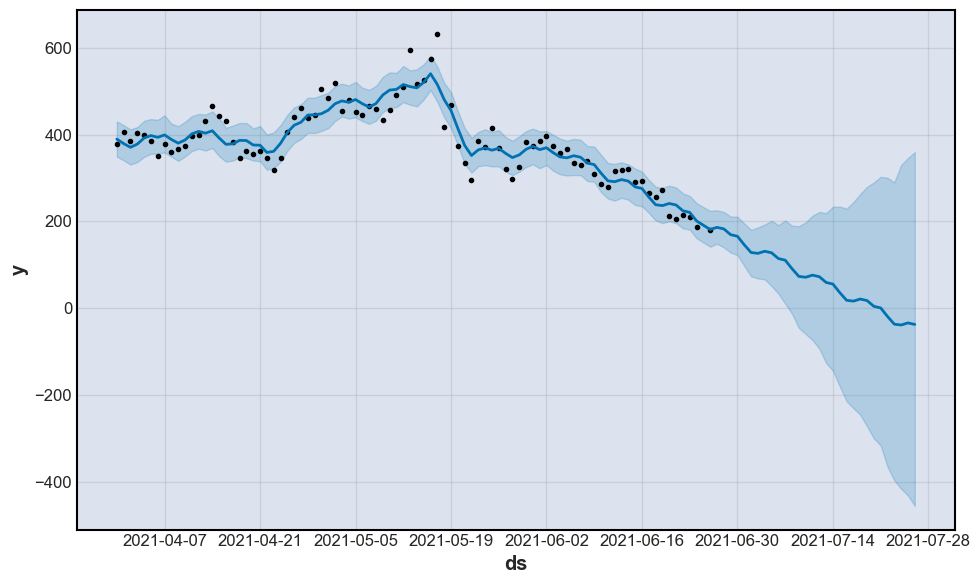

In [10]:
m.plot(forecast)